<h4>Nama   : Nadifa Salsabila Purnomo</h4>
<h4>Nim    : 2209106044</h4>
<h4>Kelas  : Informatika A2 2022</h4>
<h4>POST TEST 5 KECERDASAN BUATAN</h4>

<h4>Import Package</h4>

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

<h4>Deklarasi File CSV </h4>

In [101]:
nana = pd.read_csv('Aemf1.csv')
nana.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


Menampilkan informasi yang ada pada dataset, untuk melihat seberapa banyak objek di dalamnya

In [102]:
# nana.info()

nana['Room Type'].unique() #target

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<h4>Data Preprocessing</h4>

Mengecek apakah terdapat data dengan nilai null ?

In [103]:
nana.isna().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

Mengecek apakah terdapat data dengan nilai duplikat ?

In [104]:
nana.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41709    False
41710    False
41711    False
41712    False
41713    False
Length: 41714, dtype: bool

Normalisasi Data

In [105]:
min_max_scaler = MinMaxScaler()
nana[['Bedrooms', 'Business', 'Price', 'Cleanliness Rating', 'Guest Satisfaction', 'City Center (km)', 'Metro Distance (km)', 'Attraction Index', 'Normalised Attraction Index']] = min_max_scaler.fit_transform(nana[['Bedrooms', 'Business', 'Price', 'Cleanliness Rating', 'Guest Satisfaction', 'City Center (km)', 'Metro Distance (km)', 'Attraction Index', 'Normalised Attraction Index']])

Mengubah data kategorikal menjadi numerikal

In [106]:
label_encoder = LabelEncoder()

column = ['Shared Room', 'Private Room', 'Superhost', 'City', 'Day', 'Room Type']

In [107]:
for i in column:
    nana[i] = label_encoder.fit_transform(nana[i])

In [108]:
nana.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,0,0.008603,0,1,0,1,2.0,0,1,0.0,1.000,0.9125,0.1,0.198180,0.177775,0.014125,0.032707,98.253896,6.846473
1,0,0.016718,0,1,0,1,4.0,0,0,0.0,0.750,0.8125,0.1,0.018732,0.016614,0.136943,0.327987,837.280757,58.342928
2,0,0.012389,0,1,0,1,2.0,0,0,1.0,0.875,0.8375,0.1,0.226885,0.255711,0.013366,0.030882,95.386955,6.646700
3,0,0.021542,0,1,0,1,4.0,0,0,1.0,0.875,0.8750,0.2,0.014635,0.030661,0.106286,0.254284,875.033098,60.973565
4,0,0.024352,0,1,0,1,2.0,1,0,0.0,1.000,0.9750,0.1,0.020962,0.022170,0.119526,0.286115,815.305740,56.811677


<h4>Data Test Split</h4>

In [109]:
x = nana.drop('Room Type', axis=1) #feature
y = nana['Room Type'] #target


In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [111]:
print(f'panjang x train: {len(x_train)}\n')
print(f'panjang x test: {len(x_test)}\n')
print(f'panjang y train: {len(y_train)}\n')
print(f'panjang y test: {len(y_test)}\n')

panjang x train: 29199

panjang x test: 12515

panjang y train: 29199

panjang y test: 12515



<h4>Sequential Model</h4>

In [112]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Fungsi Call Back

In [113]:
monitor_callbacks = EarlyStopping(
    monitor='val_accuracy', 
    patience=5) #utk menghentikan 5 epoch/iterasi berikutnya

Model Compile

In [114]:
model.compile (
    optimizer= 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [115]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                304       
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 881 (3.44 KB)
Trainable params: 881 (3.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Fitting Model

In [116]:
fitting = model.fit(
    x = x_train,
    y = y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    verbose=1,
    callbacks = [monitor_callbacks]
)

Epoch 1/100


913/913 [==============================] - 3s 2ms/step - loss: 0.5944 - accuracy: 0.7373 - val_loss: 0.4324 - val_accuracy: 0.9095
Epoch 2/100
913/913 [==============================] - 2s 2ms/step - loss: 0.3261 - accuracy: 0.9117 - val_loss: 0.2022 - val_accuracy: 0.9736
Epoch 3/100
913/913 [==============================] - 2s 2ms/step - loss: 0.1598 - accuracy: 0.9680 - val_loss: 0.0762 - val_accuracy: 0.9897
Epoch 4/100
913/913 [==============================] - 2s 2ms/step - loss: 0.0789 - accuracy: 0.9795 - val_loss: 0.0563 - val_accuracy: 0.9818
Epoch 5/100
913/913 [==============================] - 2s 2ms/step - loss: 0.0274 - accuracy: 0.9886 - val_loss: 0.0193 - val_accuracy: 0.9899
Epoch 6/100
913/913 [==============================] - 2s 2ms/step - loss: 0.0045 - accuracy: 0.9886 - val_loss: -0.0234 - val_accuracy: 0.9923
Epoch 7/100
913/913 [==============================] - 2s 2ms/step - loss: -0.0154 - accuracy: 0.9876 - val_loss: -0.0435 - val_accuracy: 0.9919
Epoch 8/

<h4>Evaluasi Model</h4>

In [117]:
model.evaluate(x_test, y_test)

392/392 [==============================] - 1s 1ms/step - loss: -0.2477 - accuracy: 0.9922


[-0.24765828251838684, 0.9922493100166321]

Hasil menunjukkan bahwa model memiliki akurasi sekitar 99.18% dengan loss sekitar -0.1293, yang merupakan hasil yang sangat baik.

In [118]:

print(classification_report(y_test, model.predict(x_test).round(), target_names=['Private room', 'Entire home/apt', 'Shared room']))


392/392 [==============================] - 1s 1ms/step
                 precision    recall  f1-score   support

   Private room       1.00      1.00      1.00      8432
Entire home/apt       0.98      1.00      0.99      3987
    Shared room       0.00      0.00      0.00        96

       accuracy                           0.99     12515
      macro avg       0.66      0.67      0.66     12515
   weighted avg       0.98      0.99      0.99     12515



c:\Users\NADIFA SALSABILA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NADIFA SALSABILA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NADIFA SALSABILA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

Data tersebut adalah hasil evaluasi kinerja suatu model klasifikasi. Model tersebut memiliki tingkat akurasi sekitar 99%, yang berarti sekitar 99% prediksinya tepat. Namun, ketika kita melihat metrik lain seperti precision, recall, dan f1-score, kita melihat variasi dalam kemampuan model dalam memprediksi berbagai kelas. Model tersebut sangat baik dalam memprediksi kelas "Private room" dengan precision dan recall sekitar 1.00, tetapi memiliki kinerja yang sangat buruk dalam memprediksi kelas "Shared room," dengan precision dan recall sekitar 0.00. Rata-rata metrik seperti "Macro Avg" dan "Weighted Avg" memberikan gambaran keseluruhan tentang kinerja model, menunjukkan bahwa sebagian besar prediksinya baik, tetapi masalah terutama terjadi dalam memprediksi kelas "Shared room."

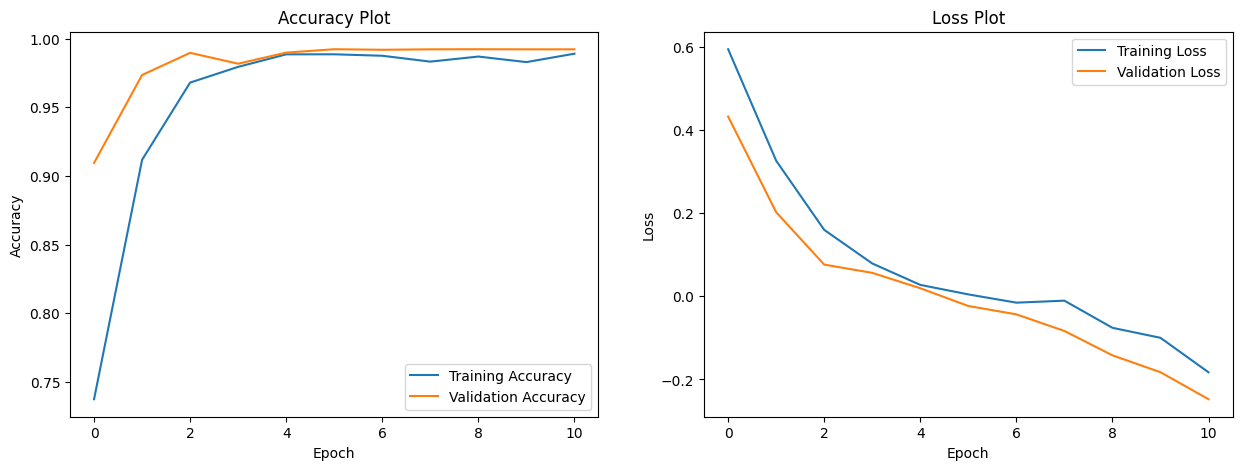

In [119]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(fitting.history['accuracy'], label='Training Accuracy')
plt.plot(fitting.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fitting.history['loss'], label='Training Loss')
plt.plot(fitting.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()